In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("StudentsPerformance.csv")
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
dataset.shape

(1000, 8)

In [4]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(dataset)

# Encode categorical columns to numeric
label_encoders = {}
for column in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Save encoders if you need them later

# Calculate correlation
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                               gender  race/ethnicity  \
gender                       1.000000       -0.001502   
race/ethnicity              -0.001502        1.000000   
parental level of education  0.001913       -0.031946   
lunch                        0.021372        0.046563   
test preparation course     -0.006028       -0.017508   
math score                   0.167982        0.216415   
reading score               -0.244313        0.145253   
writing score               -0.301225        0.165691   

                             parental level of education     lunch  \
gender                                          0.001913  0.021372   
race/ethnicity                                 -0.031946  0.046563   
parental level of education                     1.000000  0.006320   
lunch                                           0.006320  1.000000   
test preparation course                        -0.023968  0.017044   
math score                                     -0.068279  0.350877

In [6]:
#dataset.corr()

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: >

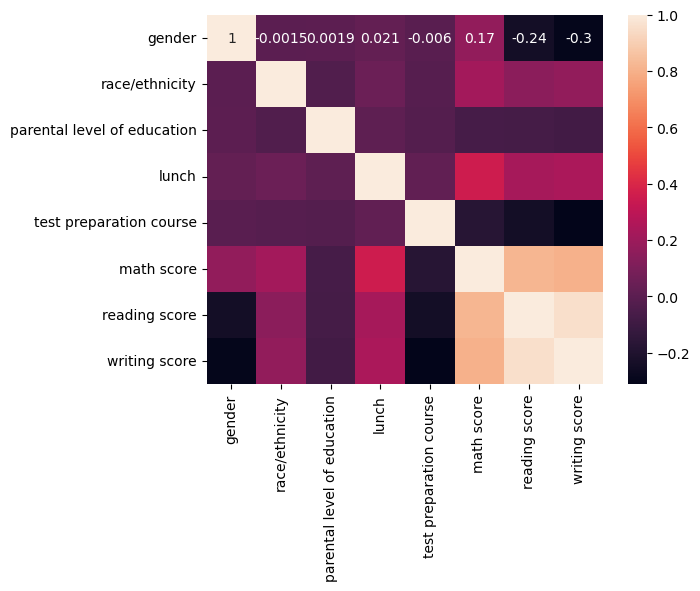

In [9]:
import seaborn as sns
sns.heatmap(correlation_matrix,annot=True)
#sns.heatmap(dataset.corr(),annot=True)

<Axes: >

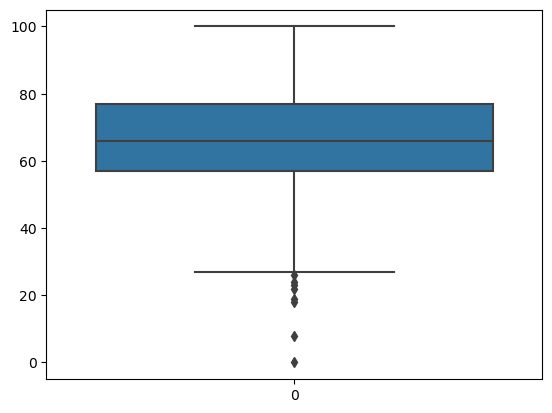

In [10]:
import seaborn as sns
sns.boxplot(dataset['math score'])

<Axes: >

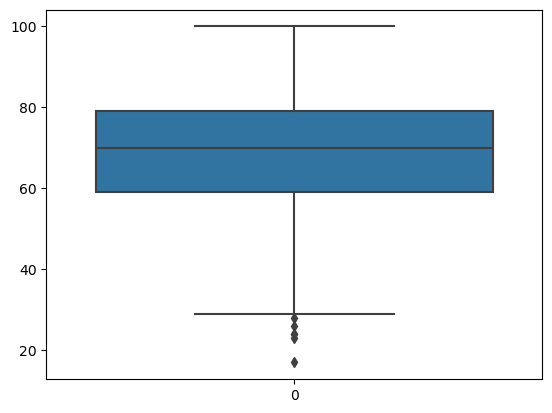

In [11]:
import seaborn as sns
sns.boxplot(dataset['reading score'])

<Axes: >

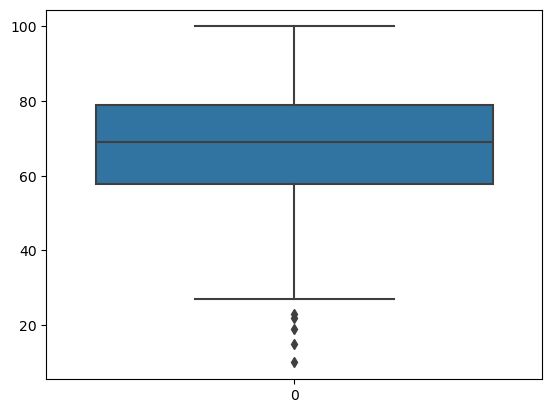

In [12]:
import seaborn as sns
sns.boxplot(dataset['writing score'])

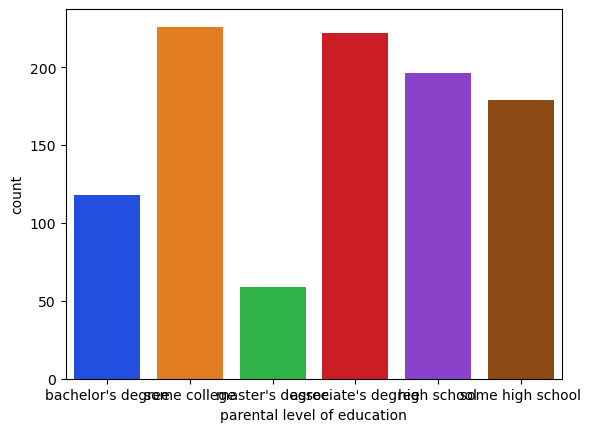

In [13]:
p = sns.countplot(x='parental level of education', data = dataset,  palette='bright')

In [14]:
dataset["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [15]:
dataset["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [16]:
dataset["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [17]:
dataset["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [18]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
passing_marks=40

In [20]:
dataset['Math_PassStatus'] = np.where(dataset['math score']<passing_marks, 'F', 'P')
dataset.Math_PassStatus.value_counts()

Math_PassStatus
P    960
F     40
Name: count, dtype: int64

In [21]:
dataset['Reading_PassStatus'] = np.where(dataset['reading score']<passing_marks, 'F', 'P')
dataset.Reading_PassStatus.value_counts()

Reading_PassStatus
P    974
F     26
Name: count, dtype: int64

In [22]:
dataset['Writing_PassStatus'] = np.where(dataset['writing score']<passing_marks, 'F', 'P')
dataset.Writing_PassStatus.value_counts()

Writing_PassStatus
P    968
F     32
Name: count, dtype: int64

In [23]:
dataset['Overall_PassStatus'] = dataset.apply(lambda x : 'F' if x['Math_PassStatus']=='F' or 
                                              x['Reading_PassStatus']=='F' or x['Writing_PassStatus']=='F' else 'P',axis=1)

In [24]:
dataset.Overall_PassStatus.value_counts()

Overall_PassStatus
P    949
F     51
Name: count, dtype: int64

In [25]:
dataset['Total_marks'] = dataset['math score']+dataset['reading score']+dataset['writing score']
dataset['Percentage']=dataset['Total_marks']/3

In [26]:
def getgrade(Percentage,Overall_PassStatus):
    if(Overall_PassStatus =='F'):
        return 'F'
    if(Percentage>=80):
        return 'A'
    if(Percentage>=70):
        return 'B'
    if(Percentage>=60):
        return 'C'
    if(Percentage>=50):
        return 'D'
    if(Percentage>=40):
        return 'E'
    else:
        return 'F'
dataset['Grade']=dataset.apply(lambda x : getgrade(x['Percentage'],x['Overall_PassStatus']),axis=1)

In [27]:
dataset.Grade.value_counts()

Grade
B    261
C    256
A    198
D    178
E     56
F     51
Name: count, dtype: int64

In [28]:
#dataset.corr()

ValueError: could not convert string to float: 'female'

In [29]:
dataset.drop(['Math_PassStatus'],axis=1,inplace=True)
dataset.drop(['Reading_PassStatus'],axis=1,inplace=True)
dataset.drop(['Writing_PassStatus'],axis=1,inplace=True)
dataset.drop(['Overall_PassStatus'],axis=1,inplace=True)

In [30]:
dataset.drop(['Total_marks'],axis=1,inplace=True)
dataset.drop(['Percentage'],axis=1,inplace=True)

In [31]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,B
1,female,group C,some college,standard,completed,69,90,88,A
2,female,group B,master's degree,standard,none,90,95,93,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,E
4,male,group C,some college,standard,none,76,78,75,B


In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["gender"]=le.fit_transform(dataset["gender"])
dataset["race/ethnicity"]=le.fit_transform(dataset["race/ethnicity"])
dataset["parental level of education"]=le.fit_transform(dataset["parental level of education"])
dataset["lunch"]=le.fit_transform(dataset["lunch"])
dataset["test preparation course"]=le.fit_transform(dataset["test preparation course"])
dataset["Grade"]=le.fit_transform(dataset["Grade"])

In [33]:
dataset.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade
0,0,1,1,1,1,72,72,74,1
1,0,2,4,1,0,69,90,88,0


In [34]:
dataset.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade
gender,1.000000,-0.001502,0.001913,0.021372,-0.006028,0.167982,-0.244313,-0.301225,0.112960
race/ethnicity,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.216415,0.145253,0.165691,-0.180764
parental level of education,0.001913,-0.031946,1.000000,0.006320,-0.023968,-0.068279,-0.072444,-0.084299,0.059616
lunch,0.021372,0.046563,0.006320,1.000000,0.017044,0.350877,0.229560,0.245769,-0.282810
test preparation course,-0.006028,-0.017508,-0.023968,0.017044,1.000000,-0.177702,-0.241780,-0.312946,0.247818
math score,0.167982,0.216415,-0.068279,0.350877,-0.177702,1.000000,0.817580,0.802642,-0.884435
reading score,-0.244313,0.145253,-0.072444,0.229560,-0.241780,0.817580,1.000000,0.954598,-0.928905
writing score,-0.301225,0.165691,-0.084299,0.245769,-0.312946,0.802642,0.954598,1.000000,-0.925820
Grade,0.112960,-0.180764,0.059616,-0.282810,0.247818,-0.884435,-0.928905,-0.925820,1.000000


In [35]:
x = dataset.iloc[:,0:8].values
y = dataset.iloc[:,8:].values

In [36]:
x.shape

(1000, 8)

In [37]:
y.shape

(1000, 1)

In [38]:
x

array([[ 0,  1,  1, ..., 72, 72, 74],
       [ 0,  2,  4, ..., 69, 90, 88],
       [ 0,  1,  3, ..., 90, 95, 93],
       ...,
       [ 0,  2,  2, ..., 59, 71, 65],
       [ 0,  3,  4, ..., 68, 78, 77],
       [ 0,  3,  4, ..., 77, 86, 86]])

In [39]:
y

array([[1],
       [0],
       [0],
       [4],
       [1],
       [1],
       [0],
       [5],
       [2],
       [5],
       [3],
       [4],
       [1],
       [1],
       [3],
       [1],
       [0],
       [5],
       [4],
       [3],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [5],
       [0],
       [0],
       [1],
       [3],
       [0],
       [3],
       [3],
       [2],
       [3],
       [2],
       [3],
       [3],
       [2],
       [1],
       [2],
       [0],
       [3],
       [1],
       [4],
       [0],
       [0],
       [5],
       [0],
       [3],
       [3],
       [5],
       [1],
       [5],
       [3],
       [1],
       [3],
       [2],
       [5],
       [2],
       [3],
       [5],
       [2],
       [2],
       [4],
       [3],
       [4],
       [5],
       [5],
       [1],
       [2],
       [2],
       [4],
       [4],
       [3],
    

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state =0)

In [41]:
x_train.shape

(800, 8)

In [42]:
y_train.shape

(800, 1)

In [43]:
x_test.shape

(200, 8)

In [44]:
y_test.shape

(200, 1)

In [45]:
# Import and build Support Vector Classifier
from sklearn.svm import SVC
svm = SVC(kernel='linear') # Linear Kernel
svm.fit(x_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [46]:
y_pred = svm.predict(x_test)

In [47]:
y_pred

array([2, 1, 5, 2, 1, 1, 1, 4, 0, 4, 3, 2, 0, 0, 3, 5, 3, 0, 3, 1, 2, 3,
       1, 2, 4, 2, 3, 3, 2, 0, 0, 0, 0, 3, 3, 0, 0, 2, 1, 1, 2, 3, 2, 1,
       1, 3, 0, 2, 0, 3, 4, 2, 4, 3, 5, 1, 3, 2, 1, 2, 2, 1, 3, 1, 2, 2,
       1, 3, 2, 3, 1, 0, 1, 2, 3, 2, 1, 1, 5, 1, 1, 0, 2, 0, 2, 1, 2, 0,
       1, 3, 1, 2, 2, 2, 1, 1, 3, 2, 2, 2, 5, 0, 2, 5, 1, 1, 2, 3, 3, 0,
       2, 1, 5, 3, 2, 1, 0, 1, 0, 3, 3, 1, 0, 0, 1, 3, 1, 1, 1, 2, 2, 2,
       5, 0, 0, 2, 2, 2, 2, 0, 1, 2, 3, 2, 1, 5, 5, 4, 0, 0, 4, 1, 0, 1,
       1, 0, 3, 3, 3, 3, 0, 4, 3, 0, 2, 1, 1, 1, 3, 2, 3, 2, 5, 2, 0, 2,
       2, 3, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 1, 4, 3, 2, 3, 1, 3, 2, 0, 0,
       2, 2])

In [48]:
y_test

array([[2],
       [1],
       [4],
       [2],
       [1],
       [1],
       [1],
       [4],
       [0],
       [5],
       [3],
       [2],
       [0],
       [0],
       [3],
       [5],
       [3],
       [0],
       [3],
       [1],
       [2],
       [3],
       [1],
       [2],
       [4],
       [2],
       [3],
       [3],
       [2],
       [0],
       [0],
       [0],
       [0],
       [3],
       [3],
       [0],
       [0],
       [2],
       [1],
       [1],
       [2],
       [3],
       [2],
       [1],
       [1],
       [3],
       [0],
       [2],
       [0],
       [3],
       [5],
       [2],
       [4],
       [3],
       [5],
       [1],
       [3],
       [2],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [2],
       [3],
       [1],
       [0],
       [1],
       [2],
       [3],
       [2],
       [1],
       [1],
       [5],
       [1],
       [1],
       [0],
       [2],
    

In [49]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [50]:
accuracy

0.98

In [51]:
from sklearn.metrics import confusion_matrix
scm=confusion_matrix(y_test,y_pred)

In [52]:
scm

array([[38,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0],
       [ 0,  0, 56,  0,  0,  0],
       [ 0,  0,  0, 38,  1,  0],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  0,  2, 10]])

Text(50.722222222222214, 0.5, 'True')

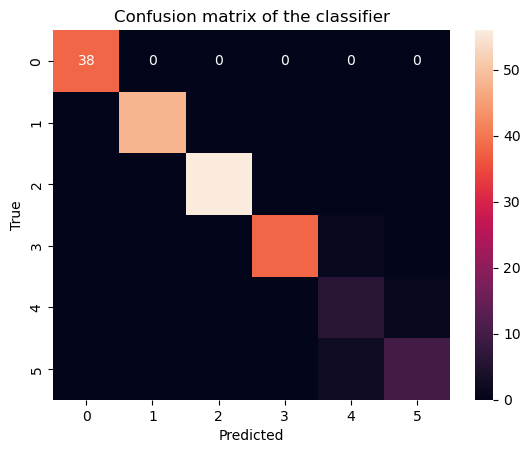

In [53]:
# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(scm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [54]:
import pickle
pickle.dump(svm,open("Grade.pkl","wb"))

In [55]:
y_predict = svm.predict([[1,   3,   1,   0,   1,  63,  66,  67]])
y_predict

array([2])

In [56]:
y_pred=svm.predict(x_test)
y_pred

array([2, 1, 5, 2, 1, 1, 1, 4, 0, 4, 3, 2, 0, 0, 3, 5, 3, 0, 3, 1, 2, 3,
       1, 2, 4, 2, 3, 3, 2, 0, 0, 0, 0, 3, 3, 0, 0, 2, 1, 1, 2, 3, 2, 1,
       1, 3, 0, 2, 0, 3, 4, 2, 4, 3, 5, 1, 3, 2, 1, 2, 2, 1, 3, 1, 2, 2,
       1, 3, 2, 3, 1, 0, 1, 2, 3, 2, 1, 1, 5, 1, 1, 0, 2, 0, 2, 1, 2, 0,
       1, 3, 1, 2, 2, 2, 1, 1, 3, 2, 2, 2, 5, 0, 2, 5, 1, 1, 2, 3, 3, 0,
       2, 1, 5, 3, 2, 1, 0, 1, 0, 3, 3, 1, 0, 0, 1, 3, 1, 1, 1, 2, 2, 2,
       5, 0, 0, 2, 2, 2, 2, 0, 1, 2, 3, 2, 1, 5, 5, 4, 0, 0, 4, 1, 0, 1,
       1, 0, 3, 3, 3, 3, 0, 4, 3, 0, 2, 1, 1, 1, 3, 2, 3, 2, 5, 2, 0, 2,
       2, 3, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 1, 4, 3, 2, 3, 1, 3, 2, 0, 0,
       2, 2])